# Sentiment Analysis: IMDB

Binary (two-class) data classification model.

* Positive
* Negative

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import imdb
from keras import layers, models
from keras import optimizers, losses, metrics

Using TensorFlow backend.


## Data Preparation and Modification

In [2]:
# num_words is the n of the most frequently occuring words
# in the training data.
(x, y), (test_x, test_y) = imdb.load_data(num_words=10000)

In [3]:
m  = len(x)
tm = len(test_x)

print(f'LENGTH\ntraining set:\t{m}\ntesting set:\t{tm}')

LENGTH
training set:	25000
testing set:	25000


In [4]:
train_mean = y.mean()
test_mean  = test_y.mean()

print(f'LABELS MEAN\ntraining data labels mean:\t{train_mean}\ntesting data lables mean:\t{test_mean}')

LABELS MEAN
training data labels mean:	0.5
testing data lables mean:	0.5


In [5]:
# Decode some samples
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x[0]])

def decode(index, data_set='training'):
    if data_set == 'training':
        return ' '.join([reverse_word_index.get(i - 3, '?') for i in x[index]])
    elif data_set == 'testing':
        return ' '.join([reverse_word_index.get(i - 3, '?') for i in test_x[index]])

In [6]:
decode(2)

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [10]:
def vectorize(seq, dim=10000):
    '''Encode a sequence to a vectorized version.
    
    Each data sample will be converted to 1D tensor of shape (dim,)
    which represents all `dim` words. If `n`th word was in original
    sample it will have a value of `1.0` else `0.` therefore most
    frequent element of the tensor is 0, by far.'''
    res = np.zeros((len(seq), dim))
    
    for i, sequence in enumerate(seq):
        res[i, sequence] = 1.
    
    return res

In [13]:
# Vectorize samples
vec_x      = vectorize(x)
vec_test_x = vectorize(test_x)

# Vectorize labels
vec_y      = np.asarray(y).astype('float32')
vec_test_y = np.asarray(test_y).astype('float32')

In [20]:
print('Non-vectorized:')
print(x[11])
print(len(x[11]))
print(y[11])
print(y[11].shape)
print()
print('Vectorized:')
print(vec_x[11])
print(vec_x[11].shape)
print(vec_y[11])
print(vec_y[11].shape)

Non-vectorized:
[1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 1398, 21, 54, 13, 219, 12, 13, 1706, 15, 4, 20, 16, 329, 6, 176, 329, 74, 51, 13, 873, 4, 156, 71, 78, 4, 7412, 322, 16, 31, 7, 4, 249, 4, 65, 16, 38, 379, 12, 100, 157, 18, 6, 910, 20, 549, 18, 4, 1496, 21, 14, 31, 9, 24, 6, 212, 12, 9, 6, 1322, 991, 7, 3002, 4, 425, 9, 73, 2218, 549, 18, 31, 155, 36, 100, 763, 379, 20, 103, 351, 5308, 13, 202, 12, 2241, 5, 6, 320, 46, 7, 457]
99
0
()

Vectorized:
[ 0.  1.  0. ...,  0.  0.  0.]
(10000,)
0.0
()


In [21]:
assert vec_x[11][1] == vec_x[11][54] == vec_x[11][13] == 1.0
assert vec_x[11][0] == vec_x[11][2]  == 0

In [22]:
# Create validation and training sets
# Validation set is 5K samples
validation_x = vec_x[:5000]
training_x   = vec_x[5000:]

validation_y = vec_y[:5000]
training_y   = vec_y[5000:]


<br>

## Model 1

---

### Architecture

* Layers: **2**
* Hidden Units: **16**
* Activation: **ReLU**
* Loss Function: **Binary Crossentropy**
* Optimization Function: **RMS Propagation**

### Hyperparameters

* Epochs: **20**
* Batch Size: **512**
* Learning Rate: **0.001**
* Validation Data: **true**


### Data Sets

* Training Set: **20,000**
* Validation Set: **5,000**
* Testing Set: **25,000**

---


In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

In [30]:
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

In [31]:
history = model.fit(
    training_x,
    training_y,
    epochs=20,
    batch_size=512,
    validation_data=(validation_x, validation_y))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20

20000/20000 [==============================] - ETA: 0s - loss: 0.4730 - binary_accuracy: 0.8124 - val_loss: 0.3585 - val_binary_accuracy: 0.8688
Epoch 2/20

20000/20000 [==============================] - ETA: 0s - loss: 0.2725 - binary_accuracy: 0.9058 - val_loss: 0.2803 - val_binary_accuracy: 0.8918
Epoch 3/20

 1536/20000 [=>............................] - ETA: 5s - loss: 0.2035 - binary_accuracy: 0.9342


20000/20000 [==============================] - ETA: 0s - loss: 0.2054 - binary_accuracy: 0.9279 - val_loss: 0.2958 - val_binary_accuracy: 0.8812
Epoch 4/20

20000/20000 [==============================] - ETA: 0s - loss: 0.1652 - binary_accuracy: 0.9420 - val_loss: 0.3140 - val_binary_accuracy: 0.8748
Epoch 5/20

 3584/20000 [====>.........................] - ETA: 4s - loss: 0.1321 - binary_accuracy: 0.9579


20000/20000 [==============================] - ETA: 0s - loss: 0.1367 - binary_accuracy: 0.9534 - val_loss: 0.2831 - val_binary_accuracy: 0.8902
Epoch 6/20

20000/20000 [==============================] - ETA: 0s - loss: 0.1179 - binary_accuracy: 0.9603 - val_loss: 0.3055 - val_binary_accuracy: 0.8848
Epoch 7/20

 5632/20000 [=======>......................] - ETA: 3s - loss: 0.0924 - binary_accuracy: 0.9714


20000/20000 [==============================] - ETA: 0s - loss: 0.0996 - binary_accuracy: 0.9667 - val_loss: 0.3360 - val_binary_accuracy: 0.8808
Epoch 8/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0849 - binary_accuracy: 0.9718 - val_loss: 0.3500 - val_binary_accuracy: 0.8842
Epoch 9/20

 7680/20000 [==========>...................] - ETA: 3s - loss: 0.0685 - binary_accuracy: 0.9798


20000/20000 [==============================] - ETA: 0s - loss: 0.0713 - binary_accuracy: 0.9777 - val_loss: 0.3920 - val_binary_accuracy: 0.8760
Epoch 10/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0596 - binary_accuracy: 0.9823 - val_loss: 0.4072 - val_binary_accuracy: 0.8762
Epoch 11/20

 9728/20000 [=============>................] - ETA: 3s - loss: 0.0457 - binary_accuracy: 0.9886


20000/20000 [==============================] - ETA: 0s - loss: 0.0494 - binary_accuracy: 0.9871 - val_loss: 0.4299 - val_binary_accuracy: 0.8778
Epoch 12/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0401 - binary_accuracy: 0.9892 - val_loss: 0.4591 - val_binary_accuracy: 0.8760
Epoch 13/20

11776/20000 [================>.............] - ETA: 2s - loss: 0.0305 - binary_accuracy: 0.9933


20000/20000 [==============================] - ETA: 0s - loss: 0.0345 - binary_accuracy: 0.9915 - val_loss: 0.4896 - val_binary_accuracy: 0.8742
Epoch 14/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0258 - binary_accuracy: 0.9940 - val_loss: 0.5218 - val_binary_accuracy: 0.8750
Epoch 15/20

13824/20000 [===================>..........] - ETA: 1s - loss: 0.0203 - binary_accuracy: 0.9958


20000/20000 [==============================] - ETA: 0s - loss: 0.0228 - binary_accuracy: 0.9944 - val_loss: 0.7232 - val_binary_accuracy: 0.8476
Epoch 16/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0167 - binary_accuracy: 0.9969 - val_loss: 0.5874 - val_binary_accuracy: 0.8702
Epoch 17/20

15872/20000 [======================>.......] - ETA: 1s - loss: 0.0135 - binary_accuracy: 0.9975


20000/20000 [==============================] - ETA: 0s - loss: 0.0136 - binary_accuracy: 0.9972 - val_loss: 0.6257 - val_binary_accuracy: 0.8686
Epoch 18/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0118 - binary_accuracy: 0.9976 - val_loss: 0.6631 - val_binary_accuracy: 0.8692
Epoch 19/20

17920/20000 [=========================>....] - ETA: 0s - loss: 0.0105 - binary_accuracy: 0.9976


20000/20000 [==============================] - ETA: 0s - loss: 0.0101 - binary_accuracy: 0.9978 - val_loss: 0.6902 - val_binary_accuracy: 0.8684
Epoch 20/20

20000/20000 [==============================] - ETA: 0s - loss: 0.0086 - binary_accuracy: 0.9984 - val_loss: 0.7206 - val_binary_accuracy: 0.8692


In [50]:
def plot_epochs(epochs, pair, labels, axis, colors, title):
    plt.plot(epochs, pair[0], colors[0], label=labels[0])
    plt.plot(epochs, pair[1], colors[1], label=labels[1])
    plt.title(title)
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])
    plt.legend()
    return plt

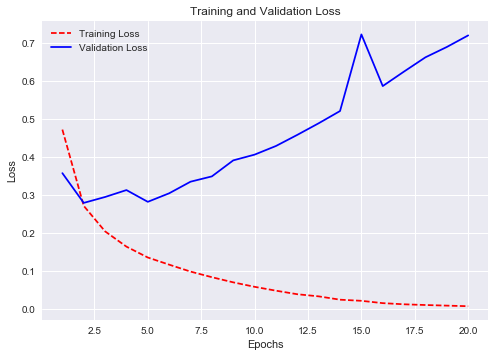

In [51]:
# Plot the training and validation loss
training_loss   = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

p = plot_epochs(
    epochs,
    (training_loss, validation_loss),
    ('Training Loss', 'Validation Loss'),
    ('Epochs', 'Loss'),
    ('r--', 'b'),
    'Training and Validation Loss')

p.show()

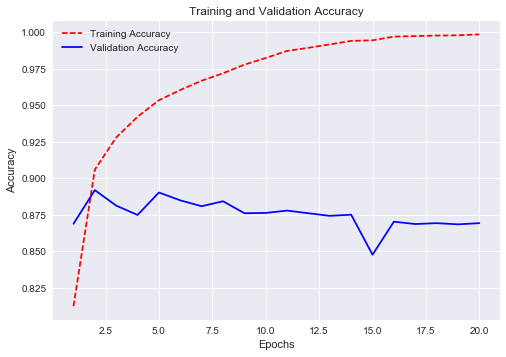

In [55]:
# Plot the training accuracy and validation accuracy
training_acc    = history.history['binary_accuracy']
validation_acc  = history.history['val_binary_accuracy']

p = plot_epochs(
    epochs,
    (training_acc, validation_acc),
    ('Training Accuracy', 'Validation Accuracy'),
    ('Epochs', 'Accuracy'),
    ('r--', 'b'),
    'Training and Validation Accuracy')

p.show()

In [73]:
# Find accuracies of
#   - training
#   - validation
#   - testing

_, training_acc   = model.evaluate(training_x,   training_y)
_, validation_acc = model.evaluate(validation_x, validation_y)
_, testing_acc    = model.evaluate(vec_test_x,   vec_test_y)


20000/20000 [==============================] - ETA: 0s

5000/5000 [==============================] - ETA: 0s

 1568/25000 [>.............................] - ETA: 7s


25000/25000 [==============================] - ETA: 0s


In [76]:
print(
    f'Accuracy Summary\n'                        \
    f'testing accuracy: \t{testing_acc}\n'       \
    f'validation accuracy: \t{validation_acc}\n' \
    f'training accuracy: \t{training_acc}\n')


Accuracy Summary
testing accuracy: 	0.8498
validation accuracy: 	0.8692
training accuracy: 	0.99985

